# Introducing graphs with Seaborn

### Getting start

In [61]:
import seaborn as sns

import pandas as pd

---

### Loading a Dataset

In [62]:
df = sns.load_dataset("penguins") ## seaborn example dataset
sns.set_style("whitegrid")

### Basic histplot

[Text(0.5, 1.0, 'HISTPLOT')]

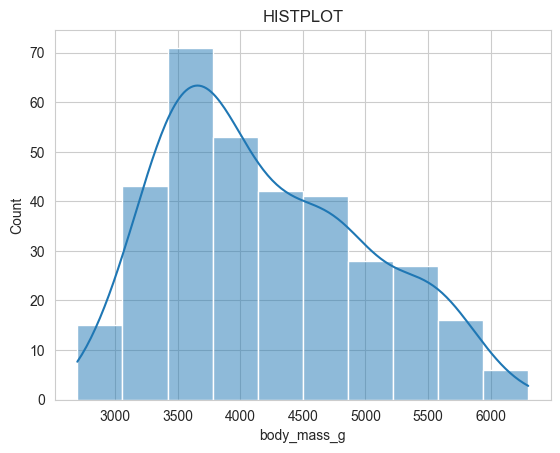

In [63]:
sns.histplot(df["body_mass_g"], bins=10 ,kde=True, ).set(title = "HISTPLOT")

# .{GRAPHPLOT}({DF[{DF_COLUMN}]})
    # bins = num of columns
    # kde = smooth histograms

### Basic boxplot

[Text(0.5, 1.0, 'body mass per island')]

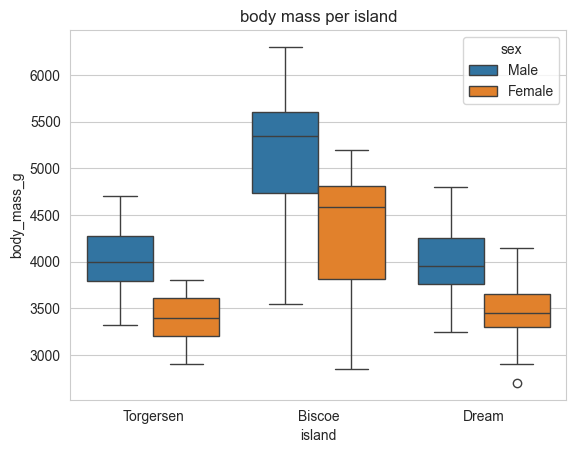

In [64]:
sns.boxplot(data = df, x="island", y="body_mass_g", hue="sex").set(title="body mass per island")
    # hue: legend

### Basic heatmap

<Axes: >

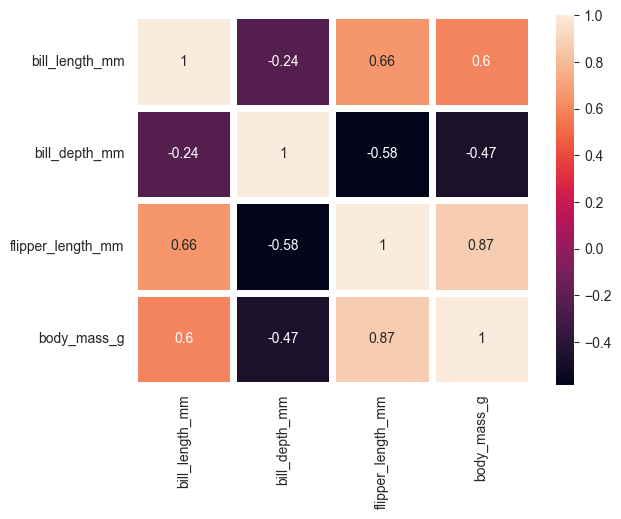

In [65]:
ping = pd.DataFrame(df[["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]]) ## reduce df

sns.heatmap(ping.corr(), annot=True, linewidths= 5, linecolor="white") 
    # annot: corr num

### Basic facetgrid

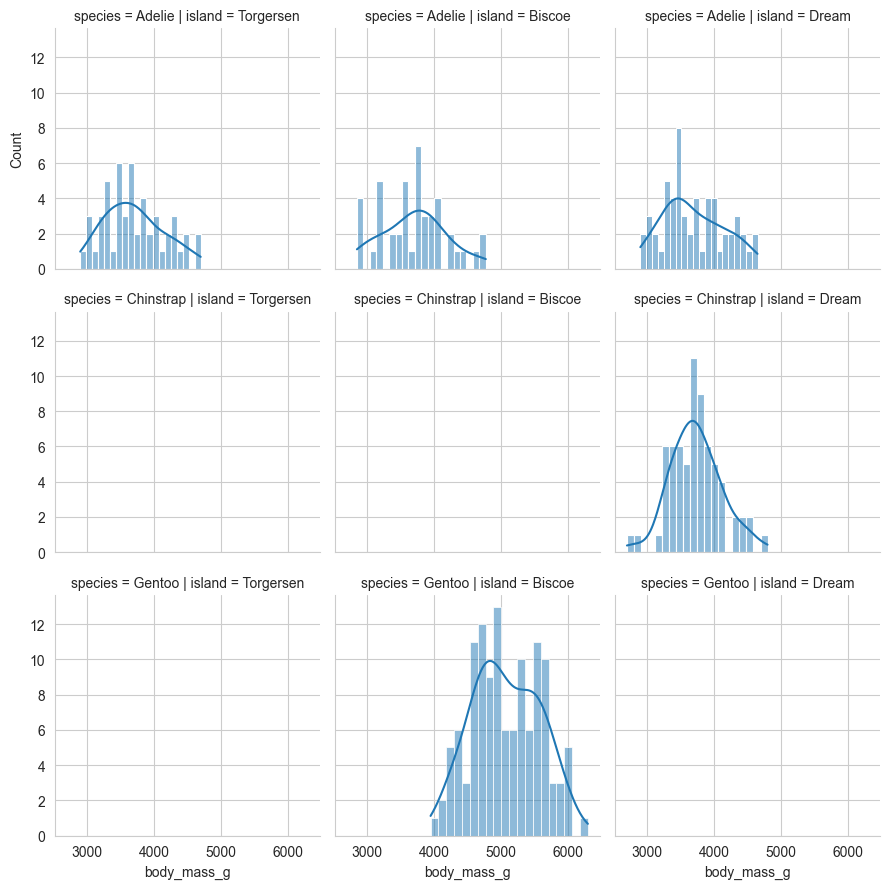

In [66]:
p = sns.FacetGrid(data = df, col = "island", row = "species")
    # facetgrid: generate a x,y empty 

p.map(sns.histplot, "body_mass_g", bins = 20, kde = True)
    #map: for each item (graph) executes (...)

# Basics map graphs with Solium

### getting start

In [67]:
import folium
import pandas as pd

from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

### loading "ES" PFR accidents df

In [68]:
ES_PFR_DF = pd.read_csv("../data/prf_acidentes_2024_todas_causas_tipos_epsg_31.csv")

### plotting base map from ES

In [69]:
ES_MAP = folium.Map(
    location=(-19.683970,-40.352783), ## "ES" x,y axis
    zoom_control=False,
    zoom_start=8,
    min_zoom= 8
    )


### creating "location (x,y)" tuple

In [70]:
cordinates = list(zip(ES_PFR_DF["latitude"], ES_PFR_DF["longitude"]))

### creating basic heatmap 

In [71]:
ES_HEAT_MAP = HeatMap(cordinates, radius=15, blur=10)

### creating basic clustermap

In [72]:
ES_CLUSTER_MAP = MarkerCluster(cordinates)

### plotting ES map with heat and cluster map

In [73]:
ES_MAP.add_child(ES_HEAT_MAP) 
ES_MAP.add_child(ES_CLUSTER_MAP)